In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("E:/下载/超市营业额.xlsx")

In [3]:
# 1
print(data.head())

     工号  姓名          日期           时段     交易额   柜台
0  1001  张三  2019-03-01   9：00-14：00  1664.0  化妆品
1  1002  李四  2019-03-01  14：00-21：00   954.0  化妆品
2  1003  王五  2019-03-01   9：00-14：00  1407.0   食品
3  1004  赵六  2019-03-01  14：00-21：00  1320.0   食品
4  1005  周七  2019-03-01   9：00-14：00   994.0  日用品


In [4]:
# 1
# (1)
print(data.iloc[[3, 5, 10], [0, 1, 4]])

      工号  姓名     交易额
3   1004  赵六  1320.0
5   1006  钱八  1421.0
10  1003  王五   936.0


In [5]:
# (2)
print(data[['姓名', '日期', '柜台']][:10])

   姓名          日期    柜台
0  张三  2019-03-01   化妆品
1  李四  2019-03-01   化妆品
2  王五  2019-03-01    食品
3  赵六  2019-03-01    食品
4  周七  2019-03-01   日用品
5  钱八  2019-03-01   日用品
6  钱八  2019-03-01  蔬菜水果
7  张三  2019-03-01  蔬菜水果
8  张三  2019-03-02   化妆品
9  李四  2019-03-02   化妆品


In [6]:
# (3)
print(data[data['交易额']<810])

       工号  姓名          日期           时段    交易额    柜台
76   1005  周七  2019-03-10   9：00-14：00   53.0   日用品
86   1003  王五  2019-03-11   9：00-14：00  801.0  蔬菜水果
97   1002  李四  2019-03-13  14：00-21：00   98.0   日用品
163  1006  钱八  2019-03-21   9：00-14：00  807.0  蔬菜水果
194  1001  张三  2019-03-25  14：00-21：00  114.0   化妆品


In [7]:
# (4)
print(data[(data['姓名']=='李四') & (data['柜台']=='日用品')])

       工号  姓名          日期           时段     交易额   柜台
81   1002  李四  2019-03-11  14：00-21：00  1045.0  日用品
89   1002  李四  2019-03-12  14：00-21：00   979.0  日用品
97   1002  李四  2019-03-13  14：00-21：00    98.0  日用品
106  1002  李四  2019-03-14  14：00-21：00   822.0  日用品
113  1002  李四  2019-03-15   9：00-14：00  1798.0  日用品
114  1002  李四  2019-03-15  14：00-21：00  1156.0  日用品
121  1002  李四  2019-03-16   9：00-14：00  1788.0  日用品
122  1002  李四  2019-03-16  14：00-21：00  1590.0  日用品
129  1002  李四  2019-03-17   9：00-14：00   828.0  日用品


In [8]:
# (5)
print(data[data['柜台']=='蔬菜水果']['交易额'].sum())

78532.0


In [9]:
# 3
# (1)
print(data['交易额'].describe())

count      246.000000
mean      1330.313008
std        904.300720
min         53.000000
25%       1031.250000
50%       1259.000000
75%       1523.000000
max      12100.000000
Name: 交易额, dtype: float64


In [10]:
# (2)
print(data.sort_values(by='交易额')[:10])

       工号  姓名          日期           时段    交易额    柜台
76   1005  周七  2019-03-10   9：00-14：00   53.0   日用品
97   1002  李四  2019-03-13  14：00-21：00   98.0   日用品
194  1001  张三  2019-03-25  14：00-21：00  114.0   化妆品
86   1003  王五  2019-03-11   9：00-14：00  801.0  蔬菜水果
163  1006  钱八  2019-03-21   9：00-14：00  807.0  蔬菜水果
248  1006  钱八  2019-03-31  14：00-21：00  812.0    食品
41   1002  李四  2019-03-06  14：00-21：00  822.0   化妆品
106  1002  李四  2019-03-14  14：00-21：00  822.0   日用品
137  1002  李四  2019-03-18   9：00-14：00  824.0   化妆品
59   1004  赵六  2019-03-08  14：00-21：00  825.0    食品


In [11]:
# 4
# (1)
print(data.groupby(by='姓名')['交易额'].sum())

姓名
周七    47818.0
张三    58130.0
李四    58730.0
王五    58892.0
赵六    56069.0
钱八    47618.0
Name: 交易额, dtype: float64


In [12]:
# (2)
print(data.pivot_table(index='姓名', columns='柜台', values='交易额', aggfunc='mean'))

柜台          化妆品          日用品         蔬菜水果           食品
姓名                                                    
周七  1189.500000  1169.363636  1174.500000  1285.142857
张三  1209.210526  3104.833333  1210.833333  1323.000000
李四  1279.187500  1122.666667  1292.388889  1224.000000
王五  1264.000000  1261.888889  1163.666667  1925.000000
赵六  1231.900000  1293.666667  1263.500000  1195.800000
钱八          NaN  1324.777778  1325.785714  1318.000000


In [13]:
# (3)
print(data.groupby(by='姓名')['交易额'].agg([np.max, np.min, np.mean, np.std]))

       amax   amin         mean          std
姓名                                          
周七   1778.0   53.0  1195.450000   333.259424
张三  12100.0  114.0  1529.736842  1791.458287
李四   1798.0   98.0  1249.574468   355.702963
王五   9031.0  801.0  1472.300000  1256.367152
赵六   1775.0  825.0  1245.977778   285.401829
钱八   1737.0  807.0  1322.722222   274.491594


In [14]:
# 5
# (1)
dayPay = data.groupby('日期')['交易额'].sum().sort_values()
print(dayPay[:3])

日期
2019-03-25    8498.0
2019-03-21    8661.0
2019-03-10    8789.0
Name: 交易额, dtype: float64


柜台
化妆品     22975.0
日用品     18629.0
蔬菜水果     7265.0
食品       9261.0
Name: 张三, dtype: float64


<AxesSubplot:xlabel='柜台'>

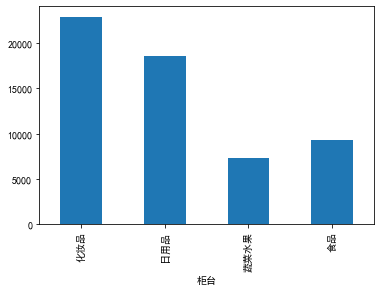

In [15]:
# (2)
zhangsanCounterVolume = data.pivot_table(index='姓名', columns='柜台', values='交易额', aggfunc='sum').loc['张三']
print(zhangsanCounterVolume)
zhangsanCounterVolume.plot(kind='bar')

日期    2019-03-01  2019-03-02  2019-03-03  2019-03-04  2019-03-05  2019-03-06  \
柜台                                                                             
化妆品       2618.0      2925.0      2395.0      2845.0      2847.0      1859.0   
日用品       2415.0      2585.0      3049.0      2748.0      2827.0      2898.0   
蔬菜水果      2668.0      2828.0      2711.0      2304.0      2548.0      2940.0   
食品        2727.0      1842.0      2949.0      3263.0      2661.0      2445.0   

日期    2019-03-07  2019-03-08  2019-03-09  2019-03-10  ...  2019-03-22  \
柜台                                                    ...               
化妆品       2912.0      2051.0      2488.0      2496.0  ...      2313.0   
日用品       2415.0      2717.0      2099.0      1033.0  ...      2479.0   
蔬菜水果      2094.0      2576.0      2788.0      2613.0  ...      2419.0   
食品        2282.0      1898.0      2723.0      2647.0  ...      2940.0   

日期    2019-03-23  2019-03-24  2019-03-25  2019-03-26  2019-03-27  2019-03-28  \


<AxesSubplot:xlabel='日期'>

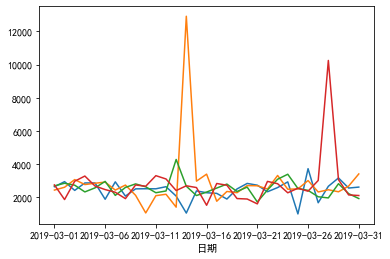

In [16]:
counterEverydayVolume = data.pivot_table(index='柜台', columns='日期', values='交易额', aggfunc='sum')
cosmeticsEverydayVolume = counterEverydayVolume.loc['化妆品']
dailyEverydayVolume = counterEverydayVolume.loc['日用品']
vegetablesEverydayVolume = counterEverydayVolume.loc['蔬菜水果']
foodEverydayVolume = counterEverydayVolume.loc['食品']
print(counterEverydayVolume)
cosmeticsEverydayVolume.plot()
dailyEverydayVolume.plot()
vegetablesEverydayVolume.plot()
foodEverydayVolume.plot()